# HW

* 데이터를 시각화 해보자. 
* 데이터를 전처리할 때 scaling의 종류는 무엇이 있는가
* 데이터를 scaling 하여 deep learning 모델에 적용해 보자

# IBM HR data
https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

# 구글 드라이브 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. 문제 파악 및 목표 설정

* 특정 직원의 퇴직 여부를 판단해 보자. 

# 2. 데이터 수집 및 전처리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 데이터 불러오기

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/hr_data.csv", encoding="utf-8", index_col=0)
df.head()

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition
0,1980-7-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.0,yes
1,1972-11-8,2011,rnd,married,very high,medium,6.93,5170672,4617495,NaN,no
2,1984-5-7,2014,rnd,single,high,high,9.00,9898200,9176045,6.0,yes
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.0,no
4,1994-7-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.0,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 0 to 1469
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   birthday              1470 non-null   object 
 1   entry_year            1470 non-null   int64  
 2   department            1470 non-null   object 
 3   marital_status        1143 non-null   object 
 4   performance_rating    1470 non-null   object 
 5   job_satisfaction      1470 non-null   object 
 6   working_hours         1470 non-null   float64
 7   salary                1470 non-null   int64  
 8   last_year_salary      1470 non-null   int64  
 9   num_companies_worked  1209 non-null   float64
 10  attrition             1470 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 137.8+ KB


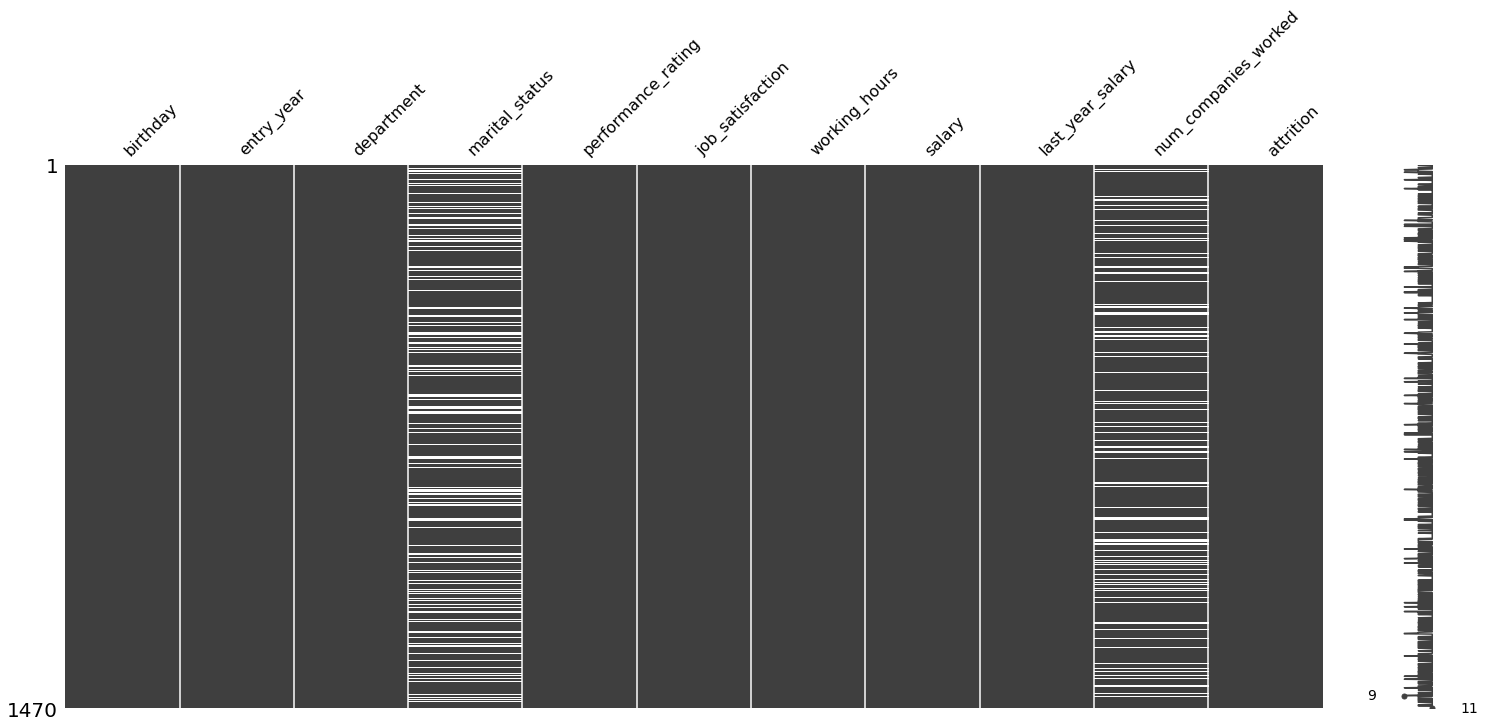

In [ ]:
msno.matrix(df);

### 결측 해결하기

* numerical
* categorical

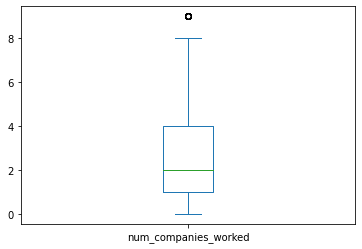

In [ ]:
df["num_companies_worked"].plot(kind="box");

In [ ]:
df['num_companies_worked'].mean()

2.7237386269644333

In [ ]:
df['num_companies_worked'] = df['num_companies_worked'].fillna(df['num_companies_worked'].mean())

In [ ]:
df['marital_status'].value_counts()

married    673
single     470
Name: marital_status, dtype: int64

In [ ]:
df['marital_status'] = df['marital_status'].fillna('etc')

In [ ]:
df['marital_status'].value_counts()

married    673
single     470
etc        327
Name: marital_status, dtype: int64

### 전처리

* numerical
    * birthday $\rightarrow$ age
    * entry_yaer $\rightarrow$ years_at_company
    * salary&last_year_salary $\rightarrow$ salary_inceasing_rate

* categorical ordinal $\rightarrow$ values
    * performance_rating
    * job_satisfaction
    
* categorical nominal $\rightarrow$ one-hot encoding
    * department
    * marital_status
    * attrition

In [ ]:
df['birthday'] = pd.to_datetime(df['birthday'], format='%Y-%m-%d')
df['birth_year'] = df['birthday'].dt.year
df['age'] = 2021-df['birth_year']+1
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age
0,1980-07-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.000000,yes,1980,42
1,1972-11-08,2011,rnd,married,very high,medium,6.93,5170672,4617495,2.723739,no,1972,50
2,1984-05-07,2014,rnd,single,high,high,9.00,9898200,9176045,6.000000,yes,1984,38
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.000000,no,1988,34
4,1994-07-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.000000,no,1994,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,rnd,married,high,very high,7.50,3488175,3214315,4.000000,no,1985,37
1466,1982-05-21,2012,rnd,married,high,low,8.33,4442500,4113806,4.000000,no,1982,40
1467,1994-02-05,2015,rnd,married,very high,medium,8.33,8715500,7908802,1.000000,no,1994,28
1468,1972-04-17,2004,sales,married,high,medium,8.67,6804200,6333023,2.000000,no,1972,50


In [ ]:
df['years_at_company'] = 2021-df['entry_year']+1
df

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company
0,1980-07-20,2013,sales,single,high,very high,8.33,9431500,8923739,8.000000,yes,1980,42,9
1,1972-11-08,2011,rnd,married,very high,medium,6.93,5170672,4617495,2.723739,no,1972,50,11
2,1984-05-07,2014,rnd,single,high,high,9.00,9898200,9176045,6.000000,yes,1984,38,8
3,1988-10-19,2013,rnd,married,high,high,8.33,5673500,5362476,1.000000,no,1988,34,9
4,1994-07-11,2015,rnd,married,high,medium,7.20,3484080,3284389,9.000000,no,1994,28,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,rnd,married,high,very high,7.50,3488175,3214315,4.000000,no,1985,37,18
1466,1982-05-21,2012,rnd,married,high,low,8.33,4442500,4113806,4.000000,no,1982,40,10
1467,1994-02-05,2015,rnd,married,very high,medium,8.33,8715500,7908802,1.000000,no,1994,28,7
1468,1972-04-17,2004,sales,married,high,medium,8.67,6804200,6333023,2.000000,no,1972,50,18


In [ ]:
df['salary_increasing_rate'] = df['salary']/df['last_year_salary']*100-100

In [ ]:
df[df['entry_year'] == 2021]

,birthday,entry_year,department,marital_status,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate
23,2000-07-21,2021,rnd,single,high,very high,7.50,8492175,8492175,1.000000,no,2000,22,1,0.0
127,2002-03-30,2021,sales,single,high,high,6.93,3990896,3990896,1.000000,yes,2002,20,1,0.0
296,2003-02-03,2021,rnd,single,high,high,7.80,5154084,5154084,1.000000,yes,2003,19,1,0.0
301,2003-03-01,2021,sales,single,high,high,7.20,5903064,5903064,1.000000,no,2003,19,1,0.0
457,2003-05-30,2021,sales,single,high,medium,7.50,6086700,6086700,1.000000,yes,2003,19,1,0.0
615,1994-06-01,2021,rnd,married,high,very high,6.67,4083200,4083200,1.000000,no,1994,28,1,0.0
727,2003-12-18,2021,rnd,single,high,very high,6.67,5790600,5790600,1.000000,no,2003,19,1,0.0
828,2003-12-19,2021,rnd,single,high,high,7.50,7185150,7185150,1.000000,yes,2003,19,1,0.0
972,2003-02-04,2021,rnd,single,high,very high,8.67,10140260,10140260,2.723739,no,2003,19,1,0.0
1153,2003-05-05,2021,sales,single,high,very high,8.33,6961750,6961750,2.723739,yes,2003,19,1,0.0


In [ ]:
df['performance_rating'].value_counts()

high         1244
very high     226
Name: performance_rating, dtype: int64

In [ ]:
df['job_satisfaction'].value_counts()

very high    459
high         442
low          289
medium       280
Name: job_satisfaction, dtype: int64

In [ ]:
level = {"low":0, "medium":1, "high":2, "very high":3}

In [ ]:
df['performance_rating'] = df["performance_rating"].replace(level)
df["job_satisfaction"] = df['job_satisfaction'].replace(level)

In [ ]:
df['department'].value_counts()

rnd      961
sales    446
hr        63
Name: department, dtype: int64

In [ ]:
df['marital_status'].value_counts()

married    673
single     470
etc        327
Name: marital_status, dtype: int64

In [ ]:
df['attrition'].value_counts()

no     1233
yes     237
Name: attrition, dtype: int64

In [ ]:
df=pd.get_dummies(df, columns = ['department','marital_status'])

In [ ]:
df['attrition'] = pd.get_dummies(df['attrition'], drop_first=True)

In [ ]:
df

,birthday,entry_year,performance_rating,job_satisfaction,working_hours,salary,last_year_salary,num_companies_worked,attrition,birth_year,age,years_at_company,salary_increasing_rate,department_hr,department_rnd,department_sales,marital_status_etc,marital_status_married,marital_status_single
0,1980-07-20,2013,2,3,8.33,9431500,8923739,8.000000,1,1980,42,9,5.690003,0,0,1,0,0,1
1,1972-11-08,2011,3,1,6.93,5170672,4617495,2.723739,0,1972,50,11,11.980024,0,1,0,0,1,0
2,1984-05-07,2014,2,2,9.00,9898200,9176045,6.000000,1,1984,38,8,7.870003,0,1,0,0,0,1
3,1988-10-19,2013,2,2,8.33,5673500,5362476,1.000000,0,1988,34,9,5.800007,0,1,0,0,1,0
4,1994-07-11,2015,2,1,7.20,3484080,3284389,9.000000,0,1994,28,7,6.080005,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1985-02-13,2004,2,3,7.50,3488175,3214315,4.000000,0,1985,37,18,8.520011,0,1,0,0,1,0
1466,1982-05-21,2012,2,0,8.33,4442500,4113806,4.000000,0,1982,40,10,7.990022,0,1,0,0,1,0
1467,1994-02-05,2015,3,1,8.33,8715500,7908802,1.000000,0,1994,28,7,10.200002,0,1,0,0,1,0
1468,1972-04-17,2004,2,1,8.67,6804200,6333023,2.000000,0,1972,50,18,7.440001,0,0,1,0,1,0


In [ ]:
df.columns

Index(['birthday', 'entry_year', 'performance_rating', 'job_satisfaction',
       'working_hours', 'salary', 'last_year_salary', 'num_companies_worked',
       'attrition', 'birth_year', 'age', 'years_at_company',
       'salary_increasing_rate', 'department_hr', 'department_rnd',
       'department_sales', 'marital_status_etc', 'marital_status_married',
       'marital_status_single'],
      dtype='object')

# 3. 모델 적용

In [ ]:
col = ['job_satisfaction', 'working_hours', 'num_companies_worked', 'age', 'years_at_company',
            'salary_increasing_rate', 'department_hr', 'department_rnd',
            'department_sales', 'marital_status_etc', 'marital_status_married', 'marital_status_single']

In [ ]:
x_data = df[col].values
y_data = df['attrition'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    random_state = 42, 
                                                    stratify=y_data)

In [ ]:
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
pred = rfc.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
rfc.score(x_test, y_test)

0.8152173913043478

In [ ]:
1 - y_train.sum()/len(y_train)

0.8384754990925589

# 4. 모델 평가

In [ ]:
matrix = metrics.confusion_matrix(y_test, pred)
matrix

array([[292,  17],
       [ 51,   8]])

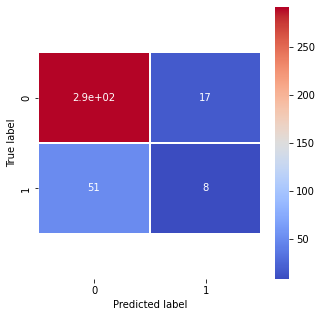

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.heatmap(matrix, 
                    cmap = "coolwarm",
                    linecolor="white",
                    linewidth=1,
                    annot=True)
    
buttom, top = ax.get_ylim()
ax.set_ylim(buttom+0.5, top-0.5)
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show()

In [ ]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90       309
           1       0.32      0.14      0.19        59

    accuracy                           0.82       368
   macro avg       0.59      0.54      0.54       368
weighted avg       0.77      0.82      0.78       368



# 5. sampling